Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv',usecols=['price','bedrooms','sqft_above','sqft_basement','yr_built','sqft_lot15'])
df.head(6)

,price,bedrooms,sqft_above,sqft_basement,yr_built,sqft_lot15
0,221900.0,3,1180,0,1955,5650
1,538000.0,3,2170,400,1951,7639
2,180000.0,2,770,0,1933,8062
3,604000.0,4,1050,910,1965,5000
4,510000.0,3,1680,0,1987,7503
5,1225000.0,4,3890,1530,2001,101930


In [ ]:
df.isnull().sum()

price            0
bedrooms         0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_lot15       0
dtype: int64

In [ ]:
df.shape

(21613, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:6], df.iloc[:,0], test_size=.2)

In [ ]:
X_train.head(3)

,bedrooms,sqft_above,sqft_basement,yr_built,sqft_lot15
2945,3,1110,600,1944,5000
9776,6,1170,730,1959,8626
21010,3,1080,1050,2010,3132


In [ ]:
lr = LinearRegression()

In [ ]:
X_train

,bedrooms,sqft_above,sqft_basement,yr_built,sqft_lot15
2945,3,1110,600,1944,5000
9776,6,1170,730,1959,8626
21010,3,1080,1050,2010,3132
18062,3,2050,0,2004,7187
18593,3,1120,410,1958,6125
...,...,...,...,...,...
15441,4,1700,720,1958,9900
14036,3,1210,0,1962,12500
3986,3,1400,370,1982,9968
13411,5,7880,0,1996,10761


In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('lr :',lr.score(X_test, y_test))

lr : 0.5481128193763349


In [ ]:
X_train.head(2)

,bedrooms,sqft_above,sqft_basement,yr_built,sqft_lot15
2945,3,1110,600,1944,5000
9776,6,1170,730,1959,8626


In [ ]:
keys = X_train.keys()

In [ ]:
trf1 = ColumnTransformer([
    ('sqrt',FunctionTransformer(func=np.sqrt),[4]),
    ('reci',FunctionTransformer(func=np.reciprocal),[2])
],remainder='passthrough')

In [ ]:
X_train_transformed = trf1.fit_transform(X_train)
X_test_transformed = trf1.transform(X_test)

In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=keys)

In [ ]:
X_train_transformed_df.head(3)

,bedrooms,sqft_above,sqft_basement,yr_built,sqft_lot15
0,70.710678,0.0,3.0,1110.0,1944.0
1,92.876262,0.0,6.0,1170.0,1959.0
2,55.964274,0.0,3.0,1080.0,2010.0


In [ ]:
X_train.head(3)

,bedrooms,sqft_above,sqft_basement,yr_built,sqft_lot15
18390,3,2010,0,1994,7200
19454,2,2410,590,1952,24506
3754,5,3070,860,1968,8190


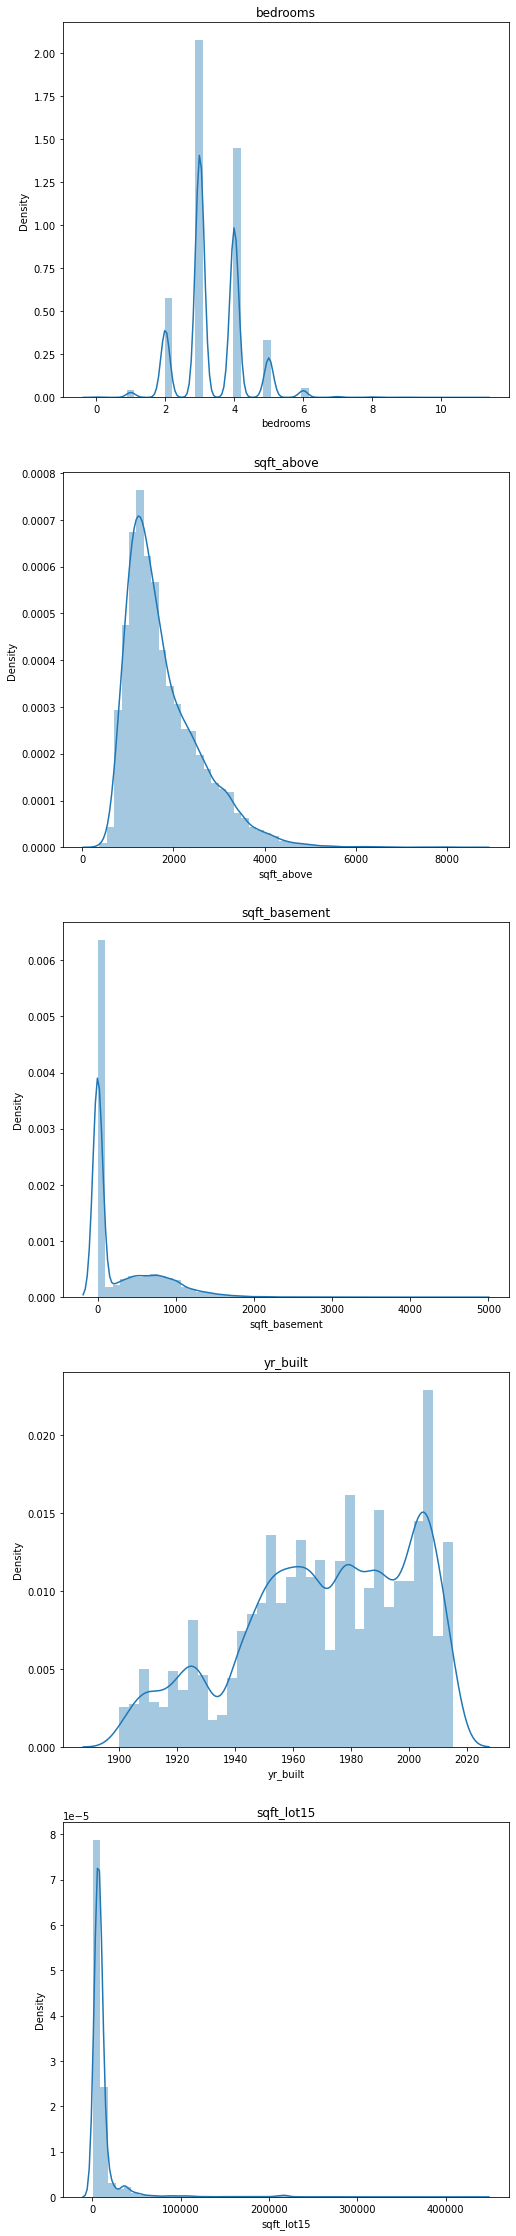

In [ ]:
plt.figure(figsize=(8,40))
plt.subplot(5,1,1)
sns.distplot(X_train['bedrooms'])
plt.title('bedrooms')


plt.subplot(5,1,2)
sns.distplot(X_train['sqft_above'])
plt.title('sqft_above')


plt.subplot(5,1,3)
sns.distplot(X_train['sqft_basement'])
plt.title('sqft_basement')


plt.subplot(5,1,4)
sns.distplot(X_train['yr_built'])
plt.title('yr_built')


plt.subplot(5,1,5)
sns.distplot(X_train['sqft_lot15'])
plt.title('sqft_lot15')
plt.show()

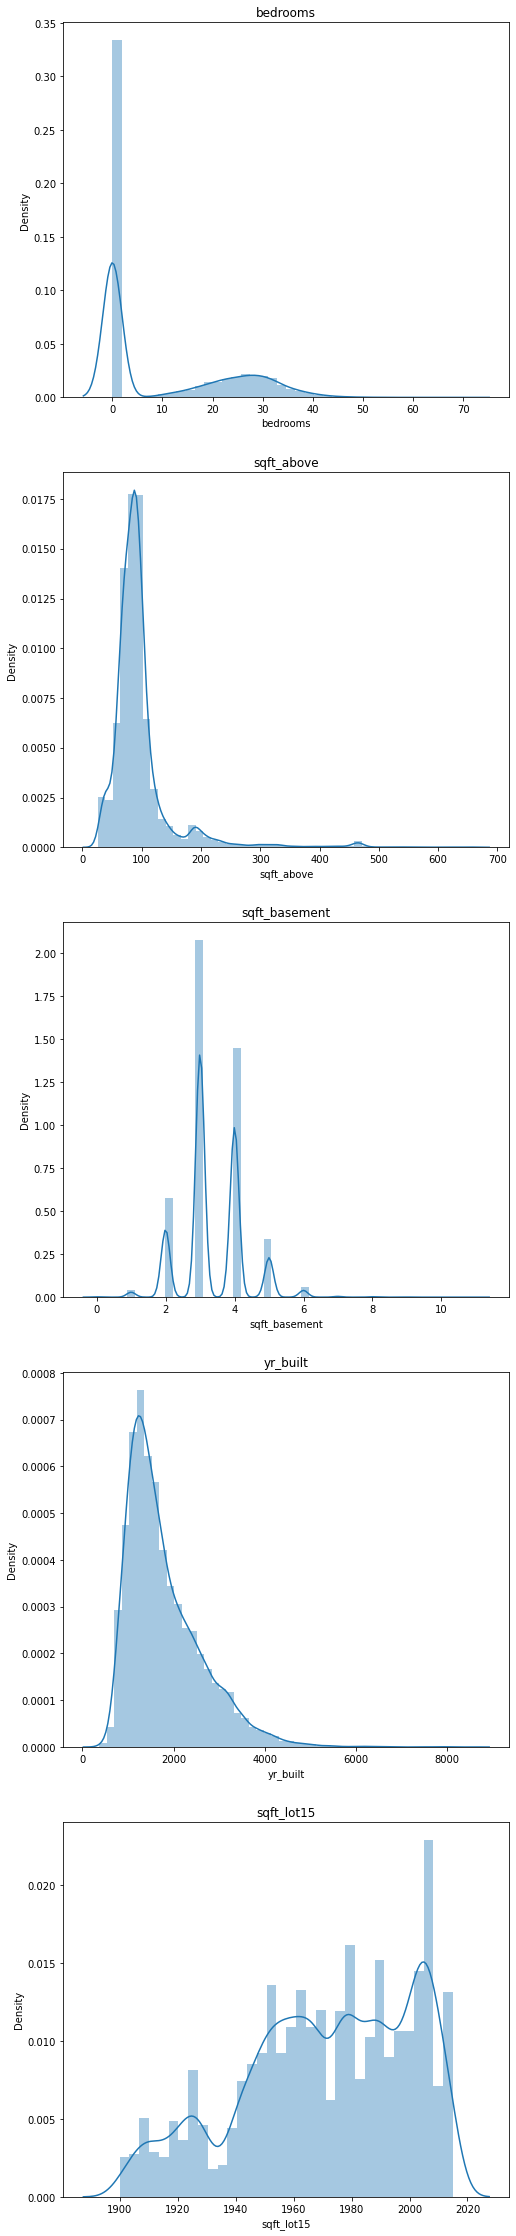

In [ ]:
plt.figure(figsize=(8,40))
plt.subplot(5,1,1)
sns.distplot(X_train_transformed_df['bedrooms'])
plt.title('bedrooms')


plt.subplot(5,1,2)
sns.distplot(X_train_transformed_df['sqft_above'])
plt.title('sqft_above')


plt.subplot(5,1,3)
sns.distplot(X_train_transformed_df['sqft_basement'])
plt.title('sqft_basement')


plt.subplot(5,1,4)
sns.distplot(X_train_transformed_df['yr_built'])
plt.title('yr_built')


plt.subplot(5,1,5)
sns.distplot(X_train_transformed_df['sqft_lot15'])
plt.title('sqft_lot15')
plt.show()

In [ ]:
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [ ]:
print('lr_transformed :',lr.score(X_test_transformed, y_test))

lr_transformed : 0.547277292777276


In [ ]:
print('lr :',lr.score(X_test, y_test))

lr : 0.5595002396969467


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/customer_data.csv',usecols=['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11','label',])
df.head(6)

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
5,0,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000


In [ ]:
df.keys()

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [ ]:
df['fea_2'] = df['fea_2'].fillna(df['fea_2'].mean().round())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:12], df.iloc[:,0], test_size=.2)

In [ ]:
X_train.head(4)

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
37,7,1335.5,3,126000.0,2,11,5,83,5,60051,1.000000
463,7,1322.0,1,115000.0,2,11,5,84,3,60052,1.000000
202,7,1272.5,1,229000.0,2,11,-1,112,3,450000,173.205081
1057,7,1326.5,1,141000.0,2,11,-1,67,5,60007,1.000000


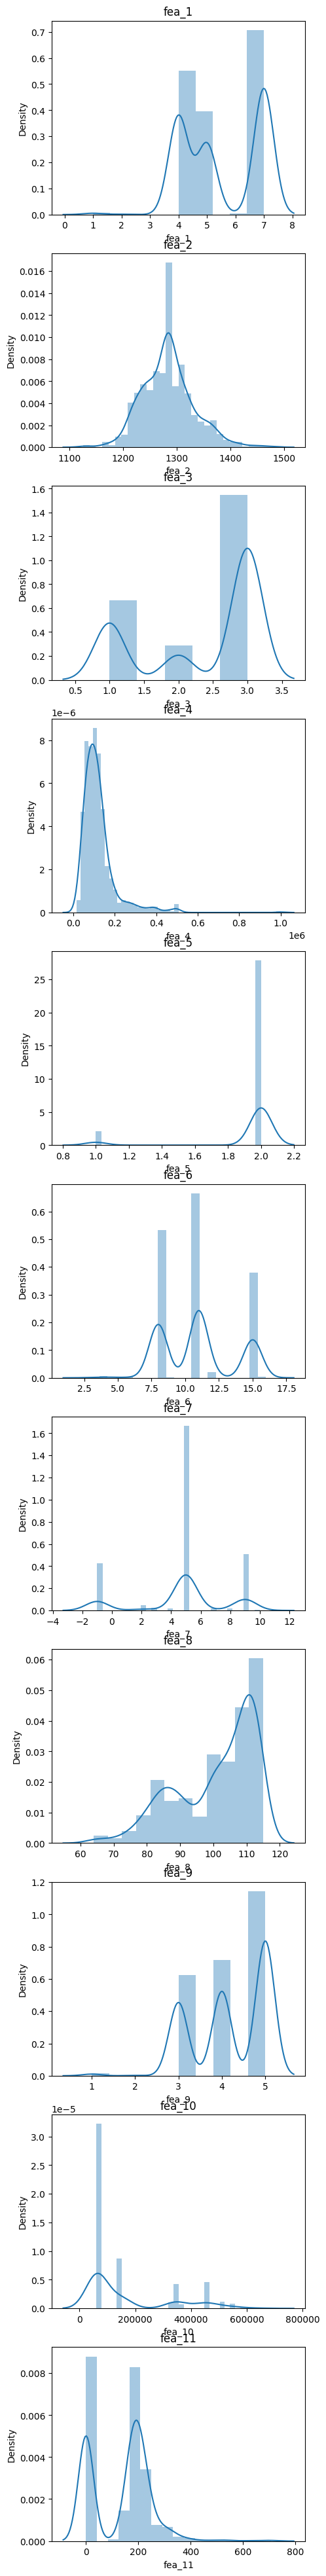

In [ ]:
plt.figure(figsize=(5,50))
plt.subplot(11,1,1)
sns.distplot(X_train['fea_1'])
plt.title('fea_1')

plt.subplot(11,1,2)
sns.distplot(X_train['fea_2'])
plt.title('fea_2')

plt.subplot(11,1,3)
sns.distplot(X_train['fea_3'])
plt.title('fea_3')

plt.subplot(11,1,4)
sns.distplot(X_train['fea_4'])
plt.title('fea_4')

plt.subplot(11,1,5)
sns.distplot(X_train['fea_5'])
plt.title('fea_5')

plt.subplot(11,1,6)
sns.distplot(X_train['fea_6'])
plt.title('fea_6')

plt.subplot(11,1,7)
sns.distplot(X_train['fea_7'])
plt.title('fea_7')

plt.subplot(11,1,8)
sns.distplot(X_train['fea_8'])
plt.title('fea_8')

plt.subplot(11,1,9)
sns.distplot(X_train['fea_9'])
plt.title('fea_9')

plt.subplot(11,1,10)
sns.distplot(X_train['fea_10'])
plt.title('fea_10')

plt.subplot(11,1,11)
sns.distplot(X_train['fea_11'])
plt.title('fea_11')
plt.show()

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [ ]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Accuracy lr :',lr.score(X_test,y_test))
print('Accuracy dt :',dt.score(X_test,y_test))

Accuracy lr : 0.7644444444444445
Accuracy dt : 0.6844444444444444


In [ ]:
trf = ColumnTransformer([
    ('cbrt',FunctionTransformer(func=np.cbrt),[1]),
    ('sqrt',FunctionTransformer(func=np.square),[7])
],remainder='passthrough')

In [ ]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [ ]:
lrr = LogisticRegression()
dtt = DecisionTreeClassifier()

In [ ]:
lrr.fit(X_train_transform,y_train)
dtt.fit(X_train_transform, y_train)

DecisionTreeClassifier()

In [ ]:
print('Accuracy lr :',lrr.score(X_test,y_test))
print('Accuracy dt :',dtt.score(X_test,y_test))

Accuracy lr : 0.6488888888888888
Accuracy dt : 0.7644444444444445


In [ ]:
keys = X_train.keys()

In [ ]:
X_train_transform_df = pd.DataFrame(X_train_transform,columns=keys)

In [ ]:
X_train.head()

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
37,7,1335.5,3,126000.0,2,11,5,83,5,60051,1.000000
463,7,1322.0,1,115000.0,2,11,5,84,3,60052,1.000000
202,7,1272.5,1,229000.0,2,11,-1,112,3,450000,173.205081
1057,7,1326.5,1,141000.0,2,11,-1,67,5,60007,1.000000
45,7,1302.5,1,92000.0,2,11,-1,105,4,60075,212.132034


In [ ]:
X_train_transform_df.head()

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,11.012383,6889.0,7.0,3.0,126000.0,2.0,11.0,5.0,5.0,60051.0,1.000000
1,10.975151,7056.0,7.0,1.0,115000.0,2.0,11.0,5.0,3.0,60052.0,1.000000
2,10.836423,12544.0,7.0,1.0,229000.0,2.0,11.0,-1.0,3.0,450000.0,173.205081
3,10.987589,4489.0,7.0,1.0,141000.0,2.0,11.0,-1.0,5.0,60007.0,1.000000
4,10.920920,11025.0,7.0,1.0,92000.0,2.0,11.0,-1.0,4.0,60075.0,212.132034


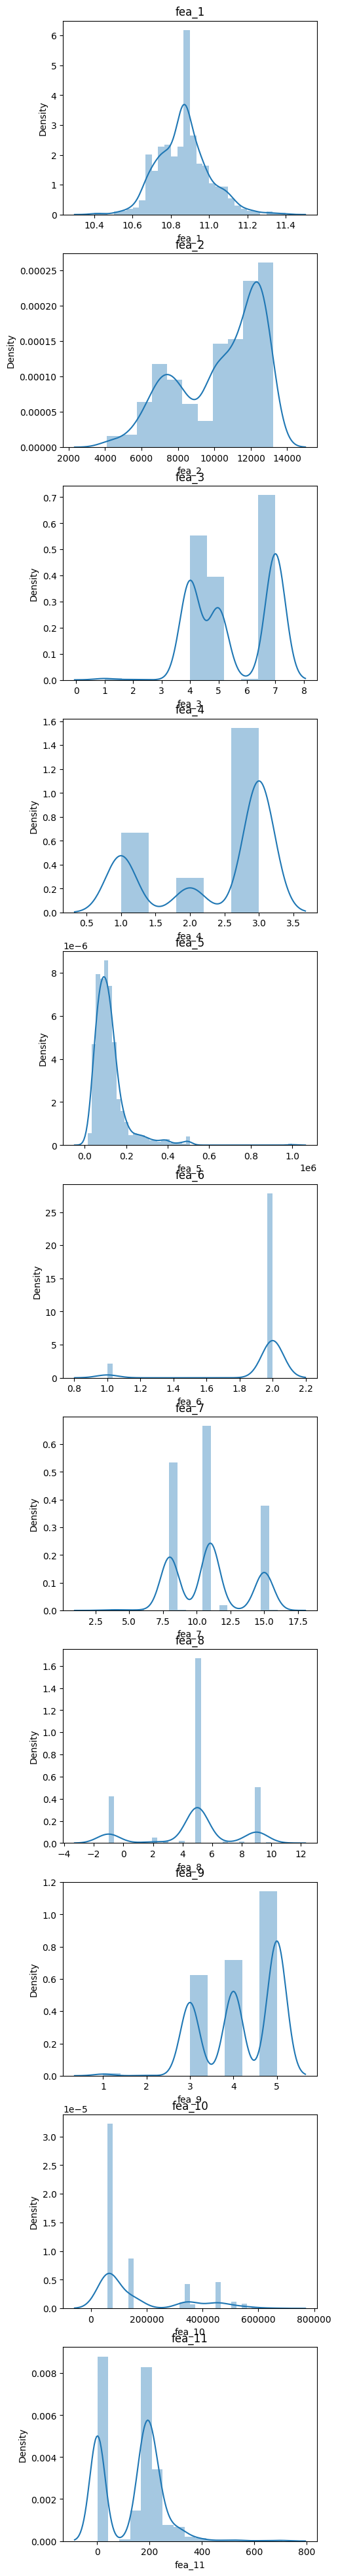

In [ ]:
plt.figure(figsize=(5,50))
plt.subplot(11,1,1)
sns.distplot(X_train_transform_df['fea_1'])
plt.title('fea_1')

plt.subplot(11,1,2)
sns.distplot(X_train_transform_df['fea_2'])
plt.title('fea_2')

plt.subplot(11,1,3)
sns.distplot(X_train_transform_df['fea_3'])
plt.title('fea_3')

plt.subplot(11,1,4)
sns.distplot(X_train_transform_df['fea_4'])
plt.title('fea_4')

plt.subplot(11,1,5)
sns.distplot(X_train_transform_df['fea_5'])
plt.title('fea_5')

plt.subplot(11,1,6)
sns.distplot(X_train_transform_df['fea_6'])
plt.title('fea_6')

plt.subplot(11,1,7)
sns.distplot(X_train_transform_df['fea_7'])
plt.title('fea_7')

plt.subplot(11,1,8)
sns.distplot(X_train_transform_df['fea_8'])
plt.title('fea_8')

plt.subplot(11,1,9)
sns.distplot(X_train_transform_df['fea_9'])
plt.title('fea_9')

plt.subplot(11,1,10)
sns.distplot(X_train_transform_df['fea_10'])
plt.title('fea_10')

plt.subplot(11,1,11)
sns.distplot(X_train_transform_df['fea_11'])
plt.title('fea_11')
plt.show()

In [ ]:
print("Accuracy lr :",lrr.score(X_train_transform_df,y_train))
print("Accuracy dt :",dtt.score(X_train_transform_df,y_train))

Accuracy lr : 0.8088888888888889
Accuracy dt : 1.0


In [ ]:
print('Accuracy lr :',lr.score(X_test,y_test))
print('Accuracy dt :',dt.score(X_test,y_test))

Accuracy lr : 0.7644444444444445
Accuracy dt : 0.6622222222222223


In [ ]:
def func_transform(transform):
  
  trf1 = ColumnTransformer([('trans',FunctionTransformer(func=transform),['fea_2']),],remainder='passthrough')
  trf1_transform_train = trf1.fit_transform(X_train)
  trf1_transform_test = trf1.transform(X_test)
  lrr.fit(trf1_transform_train,y_train)
  dtt.fit(trf1_transform_train,y_train)

  print('accuracy lr :',lrr.score(trf1_transform_test,y_test))
  print('accuracy lr :',dtt.score(trf1_transform_test,y_test))

In [ ]:
func_transform(lambda x: 1/x)

accuracy lr : 0.7644444444444445
accuracy lr : 0.6755555555555556


((array([-3.16708859e+00, -2.89951764e+00, -2.75004575e+00, -2.64454777e+00,
         -2.56219343e+00, -2.49424163e+00, -2.43616334e+00, -2.38529779e+00,
         -2.33994417e+00, -2.29894709e+00, -2.26148460e+00, -2.22695043e+00,
         -2.19488416e+00, -2.16492761e+00, -2.13679645e+00, -2.11026110e+00,
         -2.08513340e+00, -2.06125714e+00, -2.03850119e+00, -2.01675433e+00,
         -1.99592140e+00, -1.97592034e+00, -1.95667984e+00, -1.93813755e+00,
         -1.92023863e+00, -1.90293455e+00, -1.88618220e+00, -1.86994304e+00,
         -1.85418254e+00, -1.83886958e+00, -1.82397605e+00, -1.80947646e+00,
         -1.79534760e+00, -1.78156831e+00, -1.76811920e+00, -1.75498251e+00,
         -1.74214188e+00, -1.72958224e+00, -1.71728964e+00, -1.70525120e+00,
         -1.69345493e+00, -1.68188972e+00, -1.67054518e+00, -1.65941165e+00,
         -1.64848010e+00, -1.63774206e+00, -1.62718961e+00, -1.61681530e+00,
         -1.60661214e+00, -1.59657355e+00, -1.58669332e+00, -1.57696560e+00,

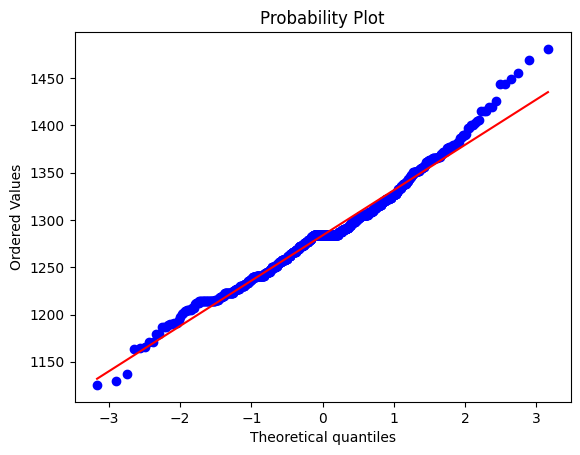

In [ ]:
stats.probplot(X_train['fea_2'], dist='norm', plot=plt)

In [ ]:
pd(X_train['fea_2'])

AttributeError: ignored

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [ ]:
L = []
for i in range(1000):
  a = random.randint(1,6)
  b = random.randint(1,6)
  L.append(a+b)

In [ ]:
len(L)

1000

In [ ]:
L[:5]

[8, 8, 9, 7, 9]

In [ ]:
s = pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()
s

7     0.180
6     0.146
8     0.121
5     0.105
9     0.104
10    0.097
4     0.086
11    0.067
3     0.042
12    0.027
2     0.025
dtype: float64

In [ ]:
a = np.cumsum(s)

<Axes: >

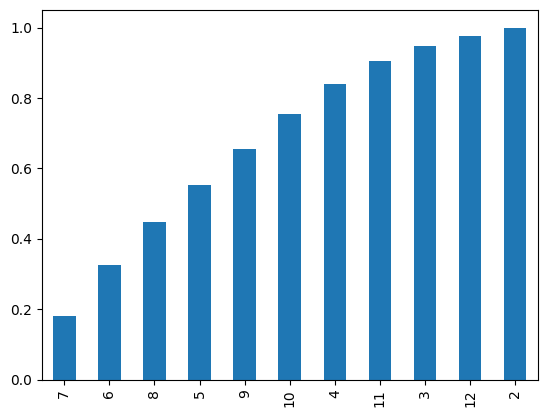

In [ ]:
a.plot(kind='bar')

<Axes: >

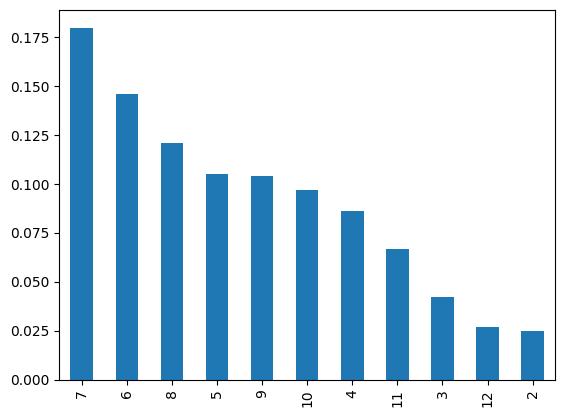

In [ ]:
s.plot(kind='bar')

In [ ]:
a =  np.array([1,1,1,1,1,5,5,5,5,5])

<ipython-input-46-f134c0697e25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a)


<Axes: ylabel='Density'>

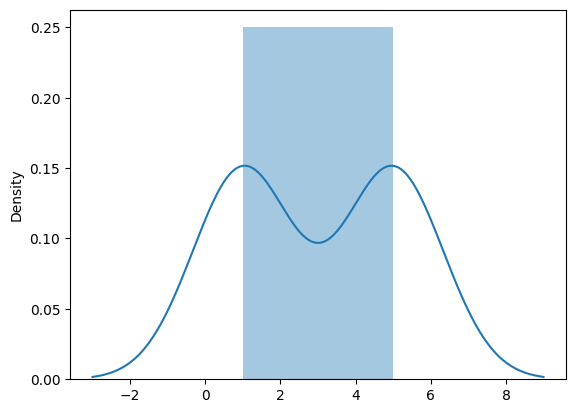

In [ ]:
sns.distplot(a)

In [177]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [179]:
df = pd.read_csv('/content/train.csv')
df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [180]:
cat = df.select_dtypes(include=['object'])

In [181]:
df.drop(cat, axis=1,inplace=True)

In [182]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [183]:
df.isnull().sum().sum()

89

In [187]:
pd.set_option('display.max_columns',None)
df.head(3)

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,65.0,8450,2003,196.0,706,150,856,856,854,1710,3,8,2003.0,548,0,61,208500
1,20,80.0,9600,1976,0.0,978,284,1262,1262,0,1262,3,6,1976.0,460,298,0,181500
2,60,68.0,11250,2001,162.0,486,434,920,920,866,1786,3,6,2001.0,608,0,42,223500


In [186]:
df.drop(columns=['Id','OverallQual','OverallCond','YearRemodAdd','BsmtFinSF2','LowQualFinSF','BsmtFullBath','BsmtHalfBath',
                 'FullBath','HalfBath','KitchenAbvGr','Fireplaces','GarageCars','EnclosedPorch','3SsnPorch','ScreenPorch',
                 'PoolArea','MiscVal','MoSold','YrSold'],axis=1,inplace=True)

KeyError: ignored

In [188]:
data = df.copy()

In [189]:
df.head(3)

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,65.0,8450,2003,196.0,706,150,856,856,854,1710,3,8,2003.0,548,0,61,208500
1,20,80.0,9600,1976,0.0,978,284,1262,1262,0,1262,3,6,1976.0,460,298,0,181500
2,60,68.0,11250,2001,162.0,486,434,920,920,866,1786,3,6,2001.0,608,0,42,223500


In [195]:
df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
YearBuilt        0
MasVnrArea       8
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageYrBlt     81
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
SalePrice        0
dtype: int64

In [197]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:17], df.iloc[:,-1], test_size=.2)

In [199]:
lr = LinearRegression()

In [200]:
lr.fit(X_train,y_train)

LinearRegression()

In [201]:
print('Accuracy lr:', lr.score(X_test, y_test))

Accuracy lr: 0.7199032189874719


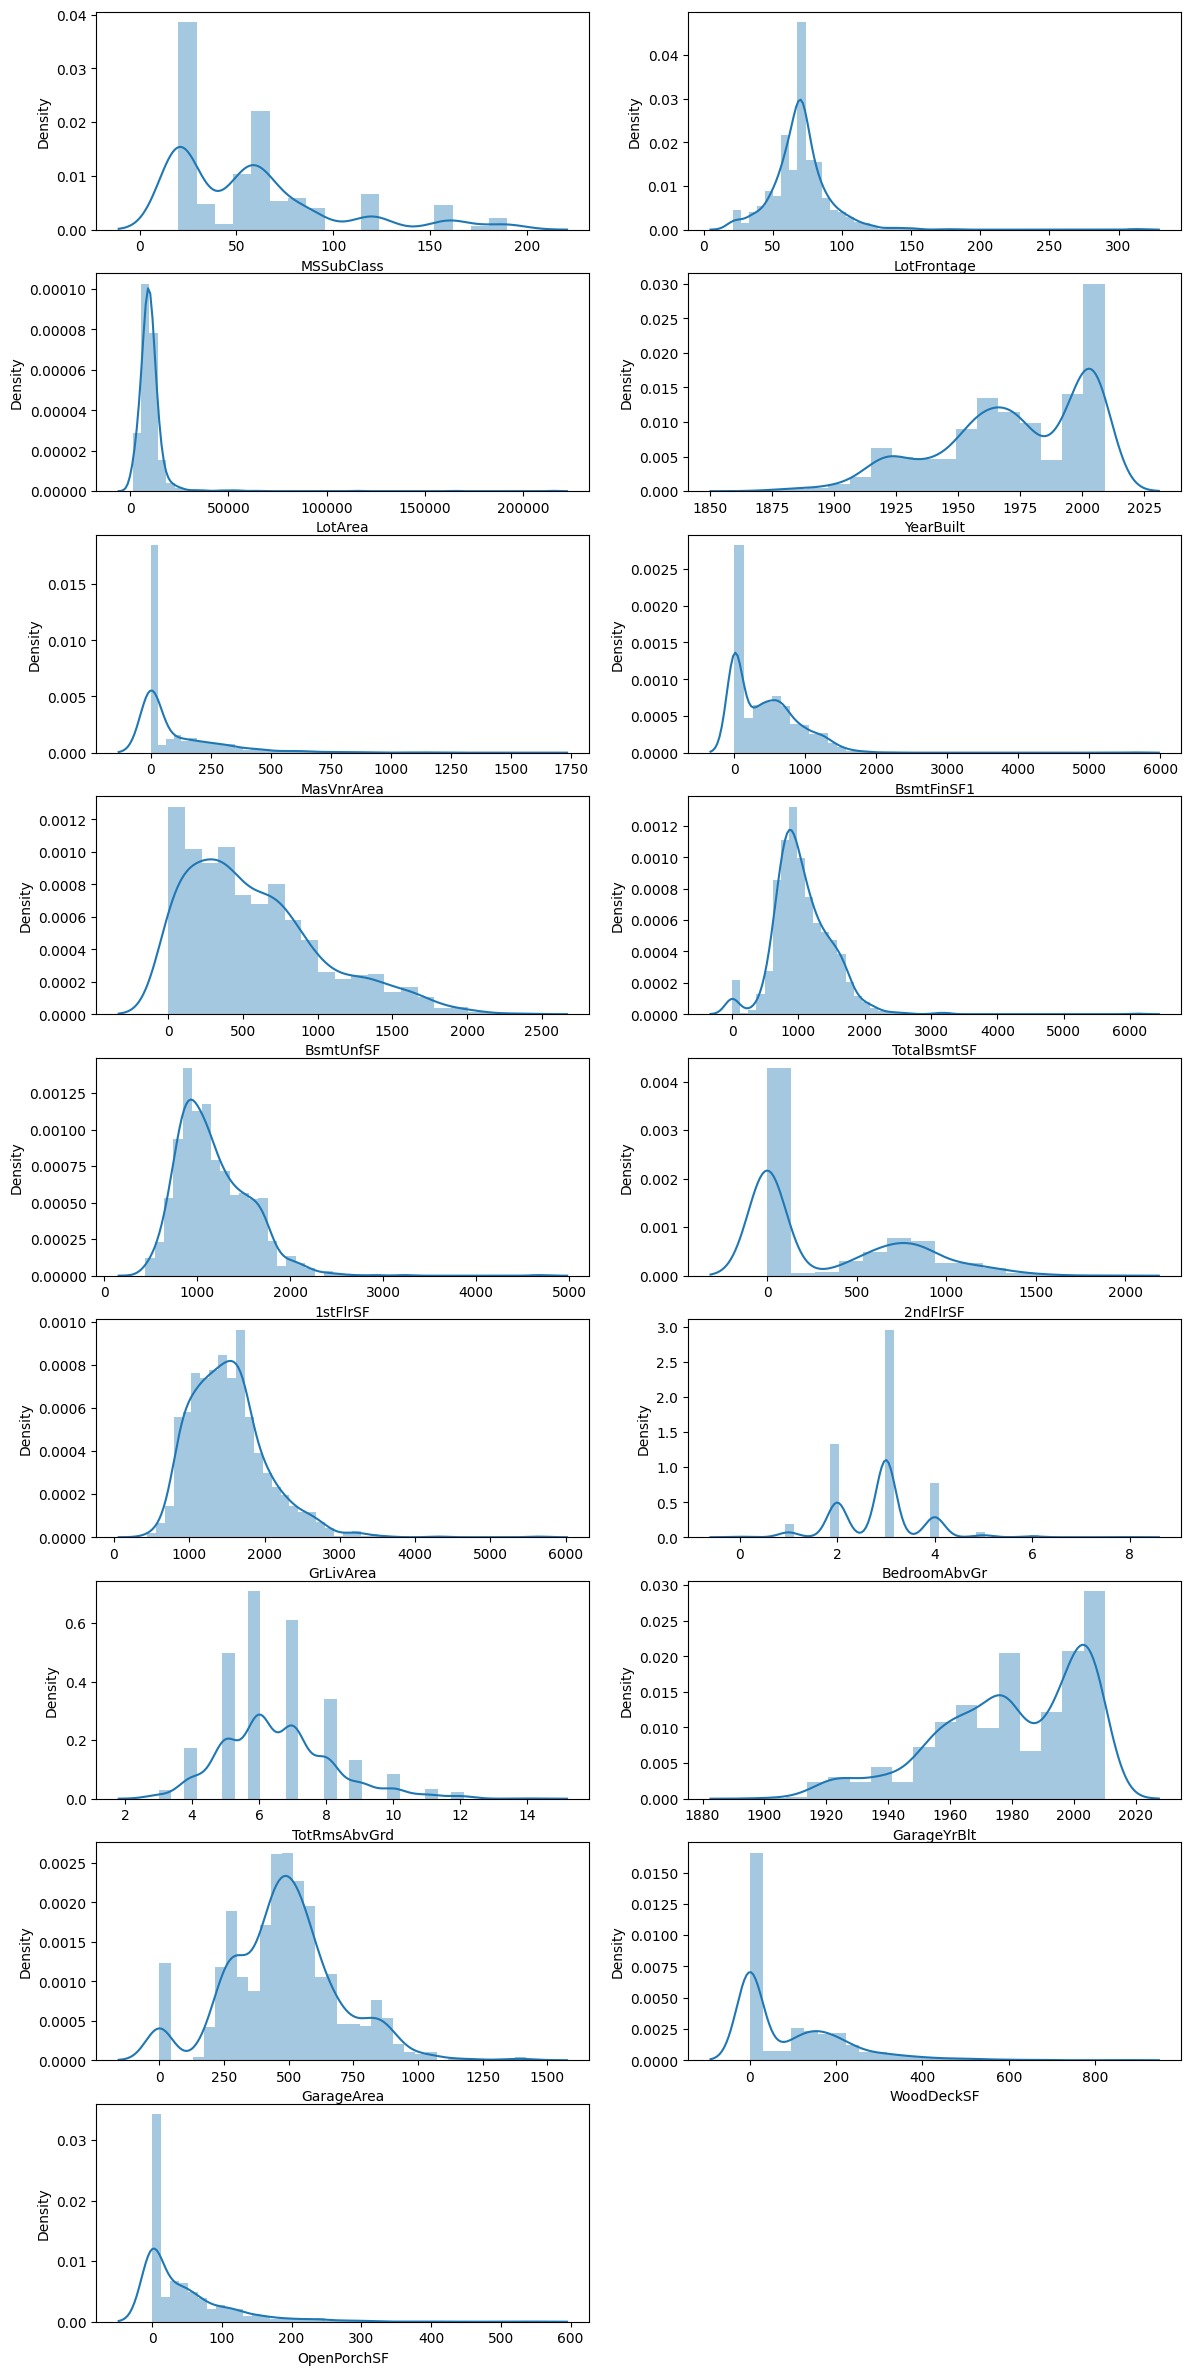

In [202]:
plt.figure(figsize=(14,30))
for i,var in enumerate(X_train):
  plt.subplot(9,2, i+1)
  sns.distplot(X_train[var])
plt.show()

In [203]:
trf = ColumnTransformer([
    ('neg_Skewed',FunctionTransformer(np.square),[3,13]),
    ('pos_skewed',FunctionTransformer(np.log1p),[4,5,6,8,10,9,15,16]),
    ('sqrt',FunctionTransformer(np.sqrt),[1,14])
],remainder='passthrough')

In [208]:
df_trf_data = trf.fit_transform(df)

In [210]:
dt = pd.DataFrame(df_trf_data,columns=data.keys())

In [212]:
dt.head(4)

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,4012009.0,4012009.0,5.283204,6.561031,5.017280,6.753438,7.444833,6.751101,0.000000,4.127134,8.062258,23.409400,60.0,8450.0,856.0,3.0,8.0,208500.0
1,3904576.0,3904576.0,0.000000,6.886532,5.652489,7.141245,7.141245,0.000000,5.700444,0.000000,8.944272,21.447611,20.0,9600.0,1262.0,3.0,6.0,181500.0
2,4004001.0,4004001.0,5.093750,6.188264,6.075346,6.825460,7.488294,6.765039,0.000000,3.761200,8.246211,24.657656,60.0,11250.0,920.0,3.0,6.0,223500.0
3,3667225.0,3992004.0,0.000000,5.379897,6.293419,6.869014,7.448916,6.629363,0.000000,3.583519,7.745967,25.337719,70.0,9550.0,756.0,3.0,7.0,140000.0


In [213]:
data.head(4)

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,65.0,8450,2003,196.0,706,150,856,856,854,1710,3,8,2003.0,548,0,61,208500
1,20,80.0,9600,1976,0.0,978,284,1262,1262,0,1262,3,6,1976.0,460,298,0,181500
2,60,68.0,11250,2001,162.0,486,434,920,920,866,1786,3,6,2001.0,608,0,42,223500
3,70,60.0,9550,1915,0.0,216,540,756,961,756,1717,3,7,1998.0,642,0,35,140000


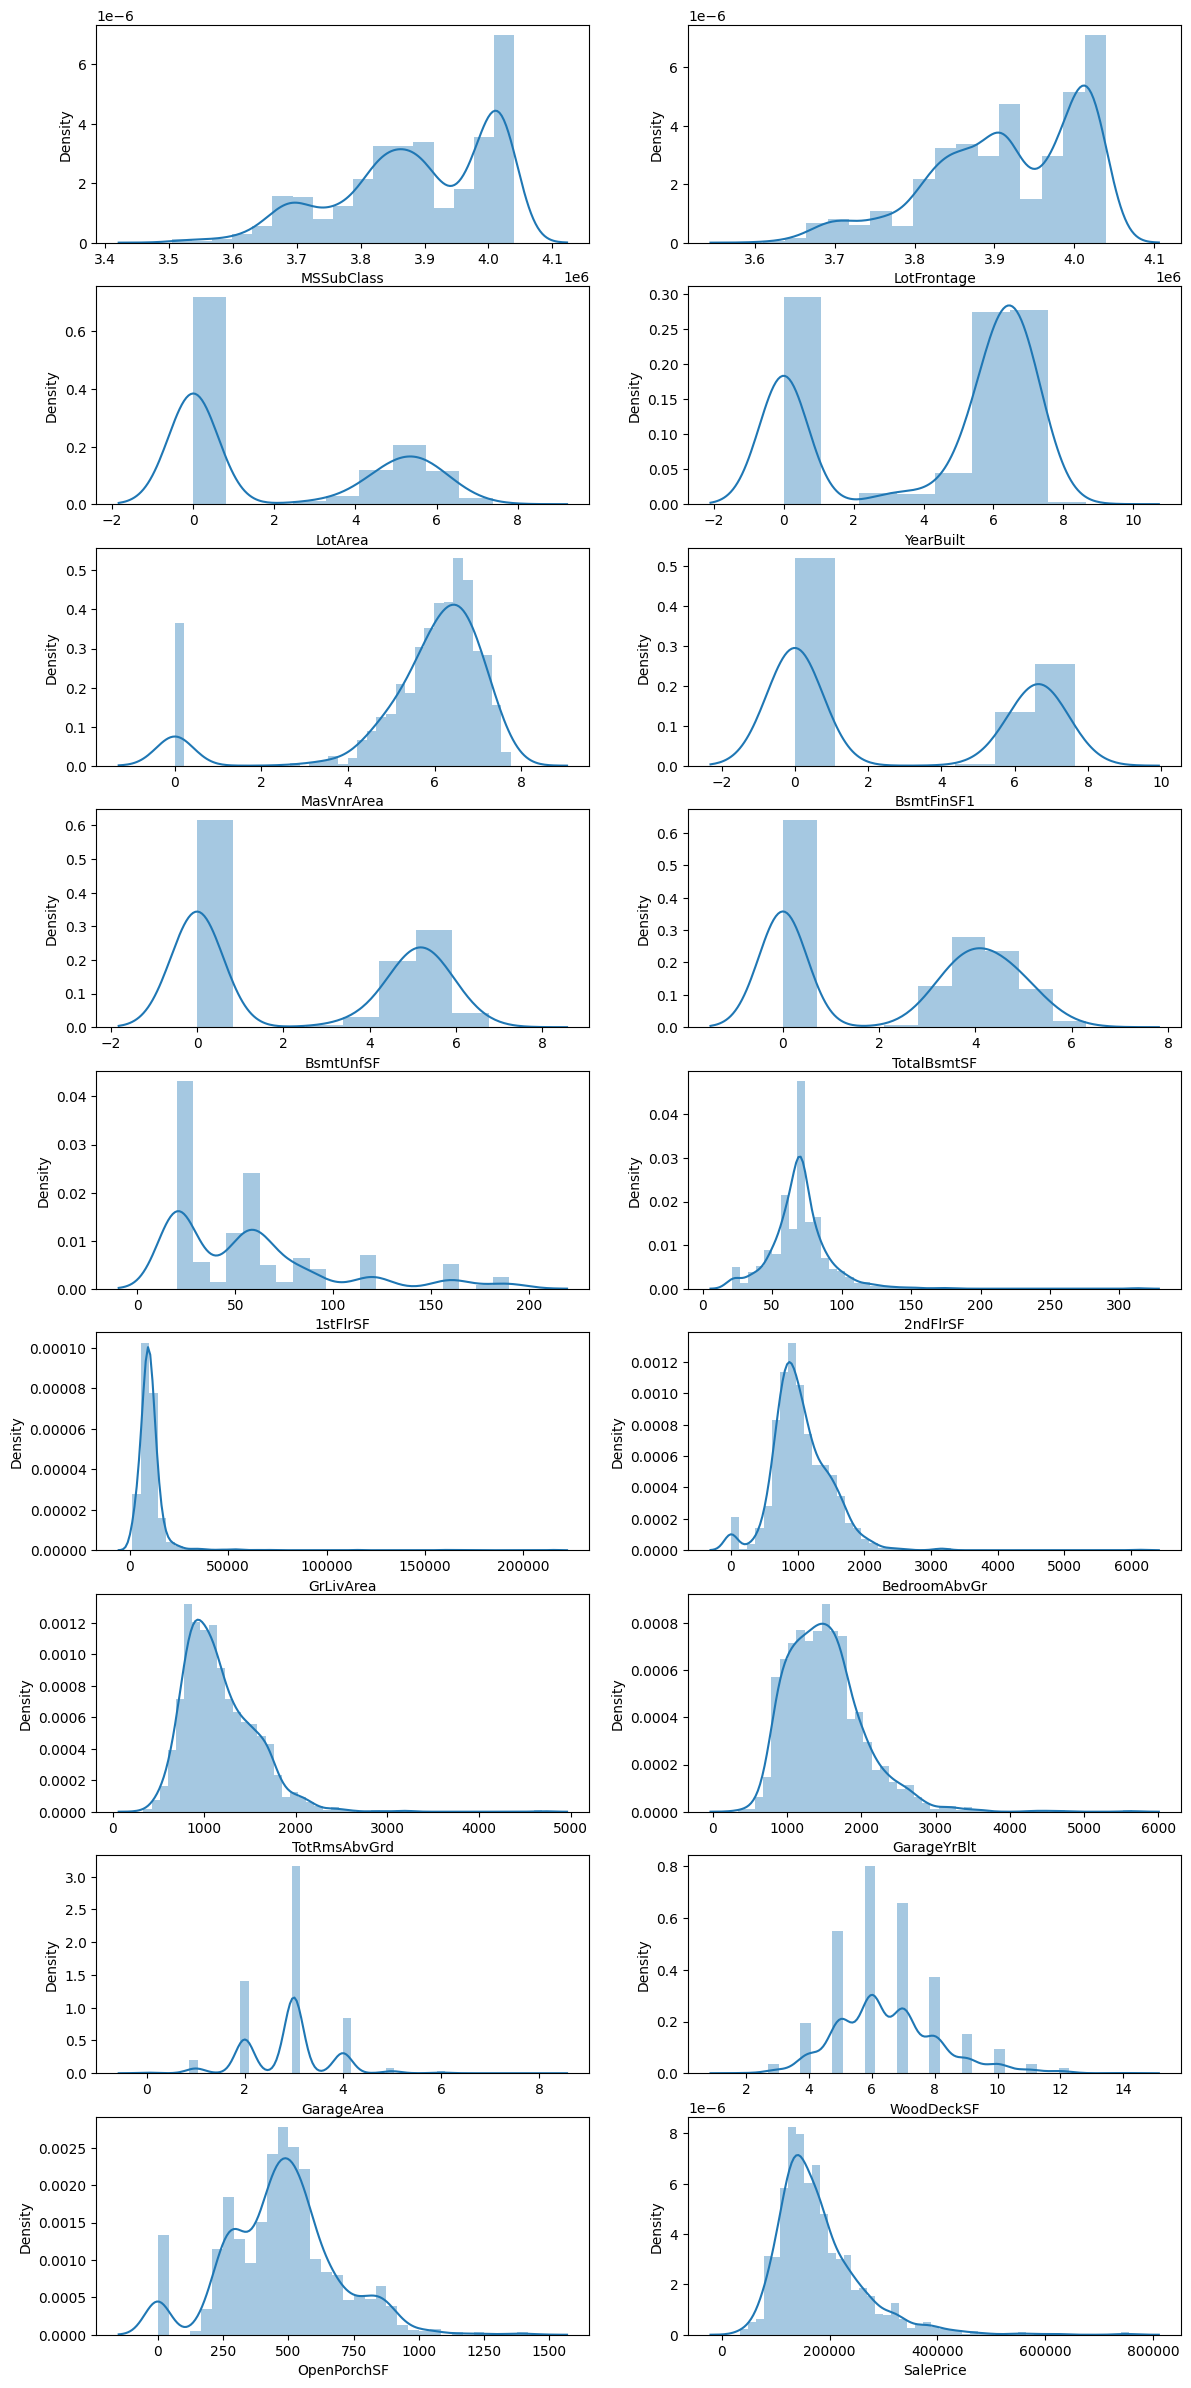

In [ ]:
plt.figure(figsize=(14,30))
for i,var in enumerate(dt):
  plt.subplot(9,2, i+1)
  sns.distplot(dt[var])
plt.show()

In [ ]:
lr.fit(dt,y_train)

LinearRegression()

In [ ]:
print("Accuracy lr :",lr.score(X_test_transform,y_test))

Accuracy lr : 0.7882949589607835


In [ ]:
df.head(3)

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,65.0,8450,2003,196.0,706,150,856,856,854,1710,3,8,2003.0,548,0,61,208500
1,20,80.0,9600,1976,0.0,978,284,1262,1262,0,1262,3,6,1976.0,460,298,0,181500
2,60,68.0,11250,2001,162.0,486,434,920,920,866,1786,3,6,2001.0,608,0,42,223500


In [214]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [215]:
df = pd.read_csv('/content/framingham_heart_disease.csv')
df.head(6)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [216]:
df.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [217]:
trf = ColumnTransformer([
    ('impute',SimpleImputer(),[2,4,5,9,12,13,14])
],remainder='passthrough')

In [218]:
df_new = trf.fit_transform(df)

In [219]:
df_data = pd.DataFrame(df_new,columns=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'])

In [220]:
df_data.isnull().sum().sum()

0

In [221]:
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [222]:
df_data.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,4.0,0.0,0.0,195.0,26.97,80.0,77.0,1.0,39.0,0.0,0.0,0.0,0.0,106.0,70.0,0.0
1,2.0,0.0,0.0,250.0,28.73,95.0,76.0,0.0,46.0,0.0,0.0,0.0,0.0,121.0,81.0,0.0
2,1.0,20.0,0.0,245.0,25.34,75.0,70.0,1.0,48.0,1.0,0.0,0.0,0.0,127.5,80.0,0.0


In [223]:
X_train,X_test,y_train,y_test = train_test_split(df_data.drop(columns='diabetes'), df_data['diabetes'], test_size=.2)

In [224]:
X_train.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3830,1.0,0.0,0.0,252.0,28.65,88.0,97.0,1.0,0.0,0.0,0.0,0.0,156.5,93.0,1.0
3247,1.0,40.0,0.0,212.0,22.34,75.0,74.0,1.0,1.0,0.0,0.0,0.0,122.5,73.0,0.0
3948,1.0,0.0,0.0,179.0,25.87,85.0,82.0,0.0,0.0,0.0,0.0,0.0,111.0,79.0,0.0
2298,1.0,40.0,0.0,230.0,26.68,67.0,92.0,1.0,1.0,0.0,1.0,0.0,149.0,95.0,1.0


In [225]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [226]:
lr.score(X_test, y_test)

0.28161755688588164

In [227]:
cross_val_score(lr,X_test, y_test).mean()

0.25666546956241276

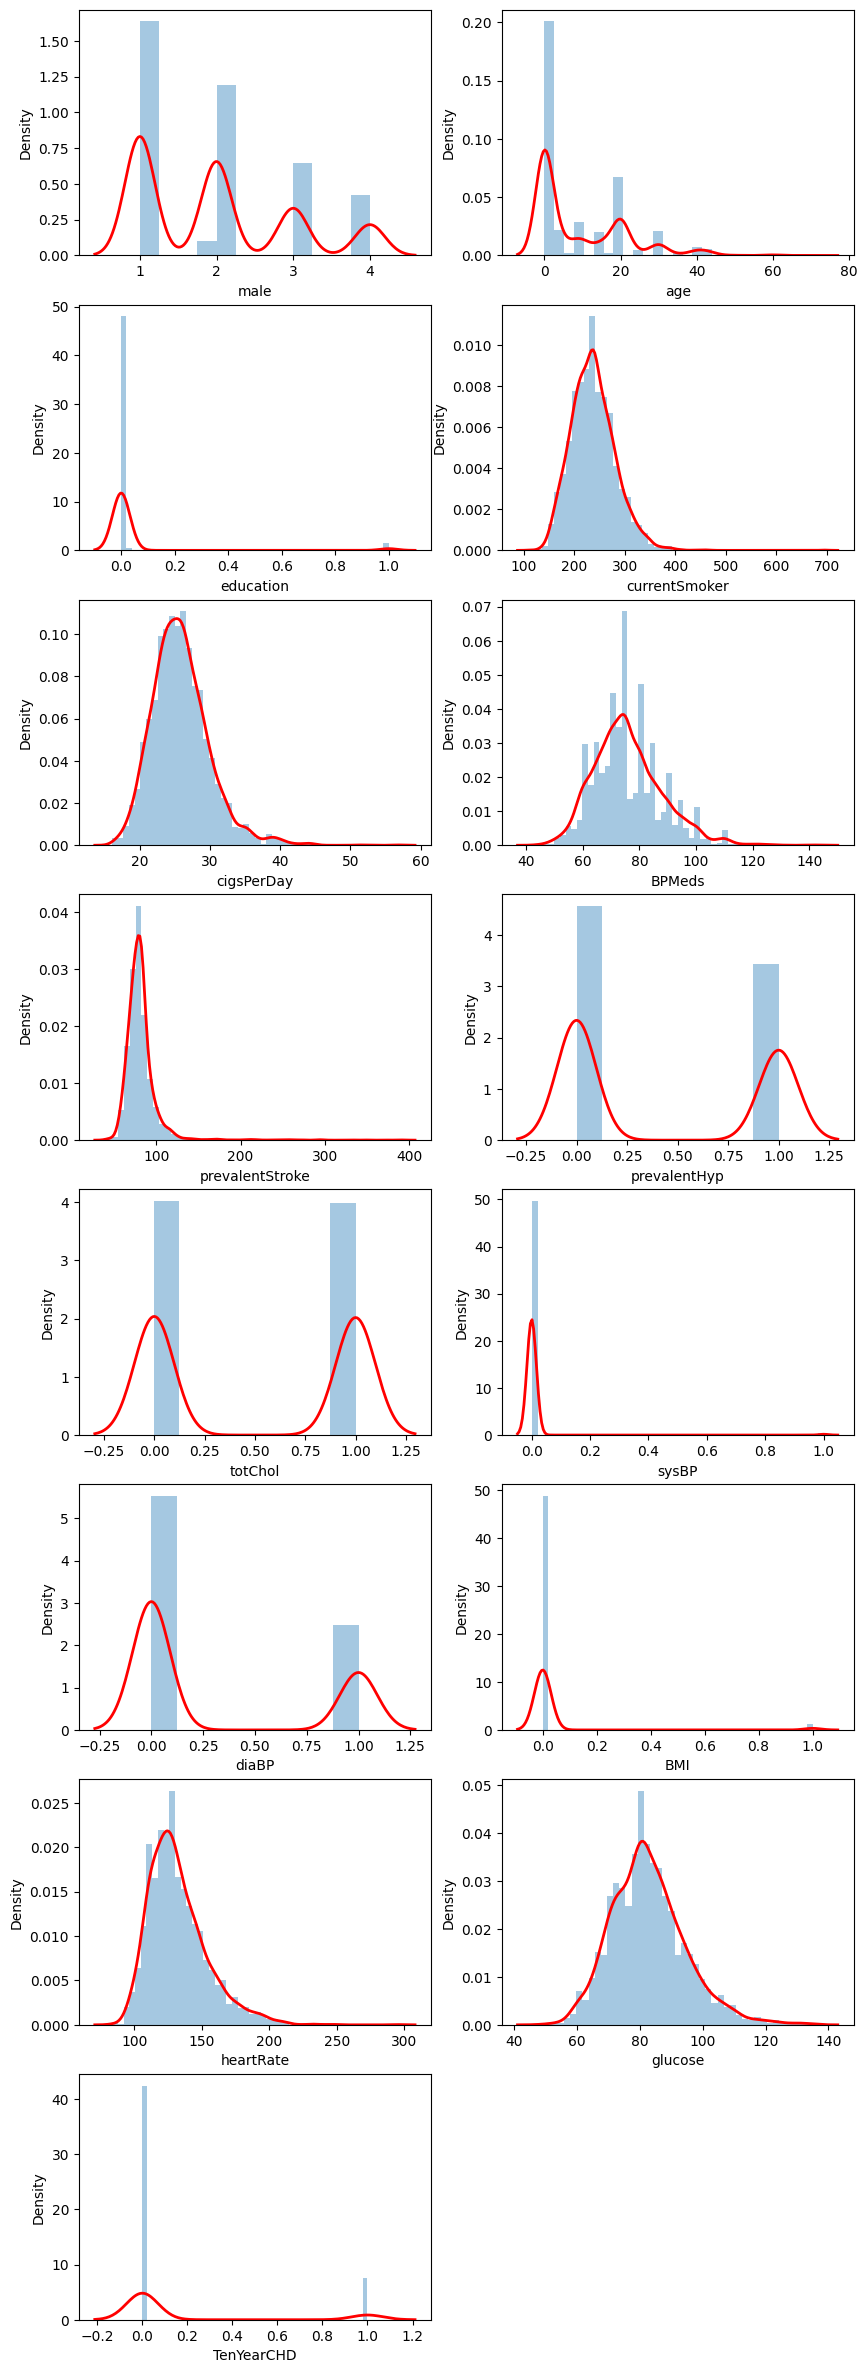

In [228]:
plt.figure(figsize=(10,30))
for i,var in enumerate(X_train):
  plt.subplot(8,2, i+1)
  sns.distplot(X_train[var], hist=20, kde_kws={'linewidth':2, 'color':'red'})
plt.show()

In [229]:
norm_dist = X_train.loc[:, ['age','cigsPerDay','heartRate','BPMeds','glucose']]

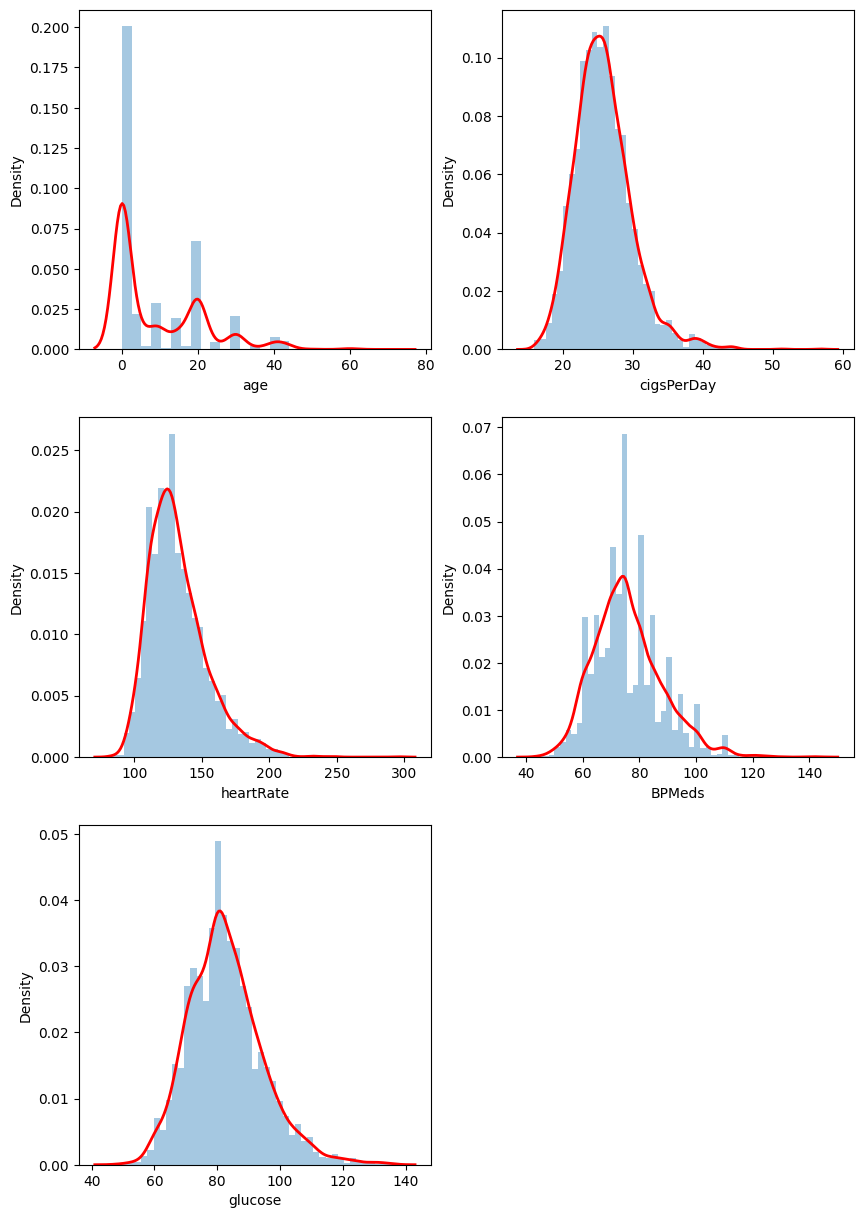

In [230]:
plt.figure(figsize=(10,15))
for i,var in enumerate(norm_dist):
  plt.subplot(3,2, i+1)
  sns.distplot(norm_dist[var], hist=20, kde_kws={'linewidth':2, 'color':'red'})
plt.show()

In [294]:
trf1 = ColumnTransformer([
    ('log_age',FunctionTransformer(func=np.sqrt),[0]),
    ('log',FunctionTransformer(func=np.log1p),[1,2]),
],remainder='passthrough')

In [295]:
norm_dist_data = trf1.fit_transform(norm_dist)
norm_dist_data1 = trf1.transform(X_test)

ValueError: ignored

In [296]:
norm_dist_df = pd.DataFrame(norm_dist_data,columns=norm_dist.keys())
norm_dist_df_test = pd.DataFrame(norm_dist_data1,columns=norm_dist.keys())

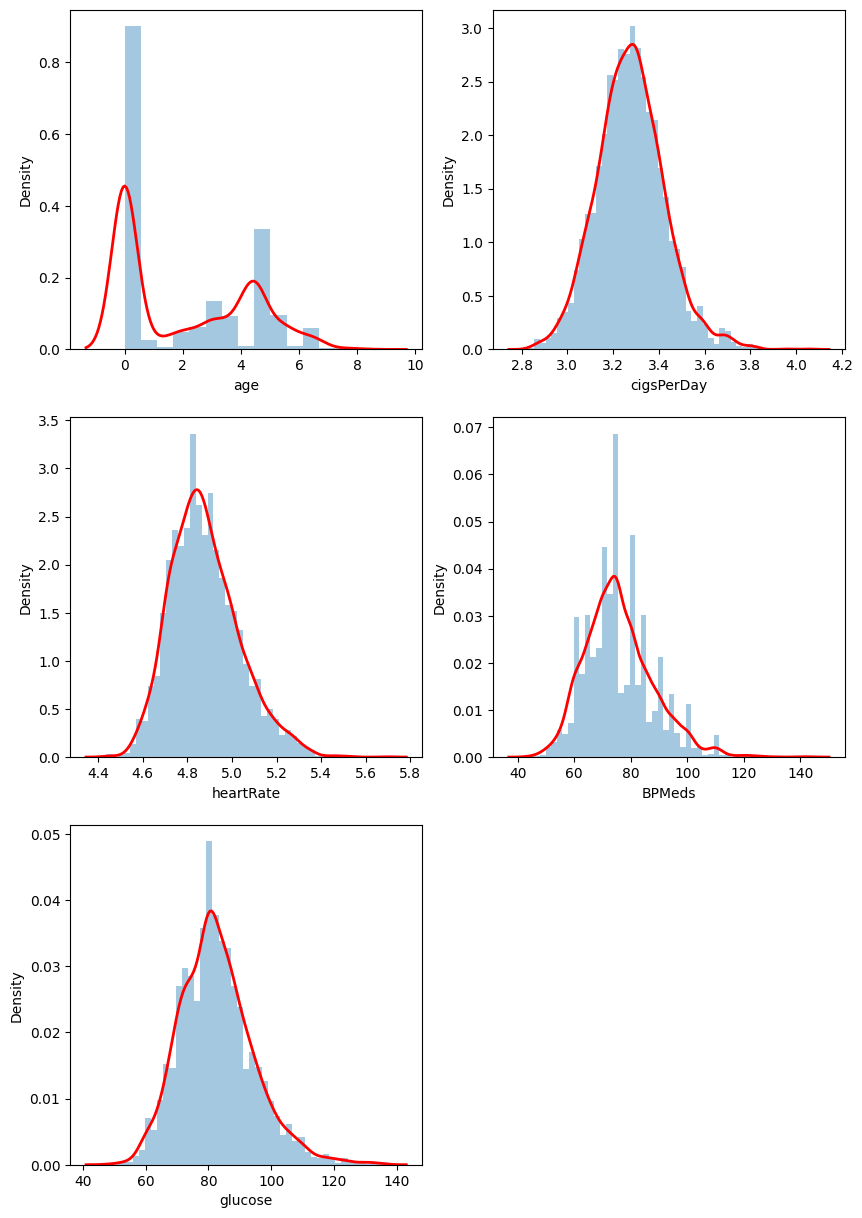

In [297]:
plt.figure(figsize=(10,15))
for i,var in enumerate(norm_dist_df):
  plt.subplot(3,2, i+1)
  sns.distplot(norm_dist_df[var], hist=20, kde_kws={'linewidth':2, 'color':'red'})
plt.show()

In [298]:
norm_dist = X_train.loc[:, ['age','cigsPerDay','heartRate','BPMeds','glucose']]

KeyError: ignored

In [ ]:
X_train.drop(columns=['age','cigsPerDay','heartRate','BPMeds','glucose'],inplace=True)

In [ ]:
X_train.head(2)

In [ ]:
norm_dist_df.head(2)

In [ ]:
a = X_train.values

In [ ]:
b = norm_dist_df.values

In [ ]:
new_df_X_train = np.concatenate([a,b],axis=1)

In [ ]:
new_df_X_train.shape

In [ ]:
X_test.drop(columns=['age','cigsPerDay','heartRate','BPMeds','glucose'],inplace=True)

In [ ]:
new_df_X_test = np.concatenate([norm_dist_data1,X_test.values], axis=1)

In [ ]:
lr.fit(new_df_X_train,y_train)

In [ ]:
lr.score(new_df_X_test,y_test)

In [ ]:
new_df_X_test.shape

In [ ]:
cross_val_score(lr,new_df_X_test,y_test).mean()

In [299]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [312]:
df = pd.read_csv('/content/House_price.csv')
df.drop(columns=['Address'], inplace=True)

In [313]:
df.head(4)

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.988
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.807


In [314]:
df.keys()

Index(['Avg. Area Income', 'House Age', 'Number of Rooms',
       'Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [315]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:5], df.iloc[:,-1],test_size=.2)

In [317]:
X_train.head(3)

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
3446,48692.28196,5.201388,7.424669,5.38,40082.43600
2166,65013.21245,7.321305,7.591328,3.13,23039.88947
3729,71393.10377,4.542919,7.517311,6.40,42077.48142


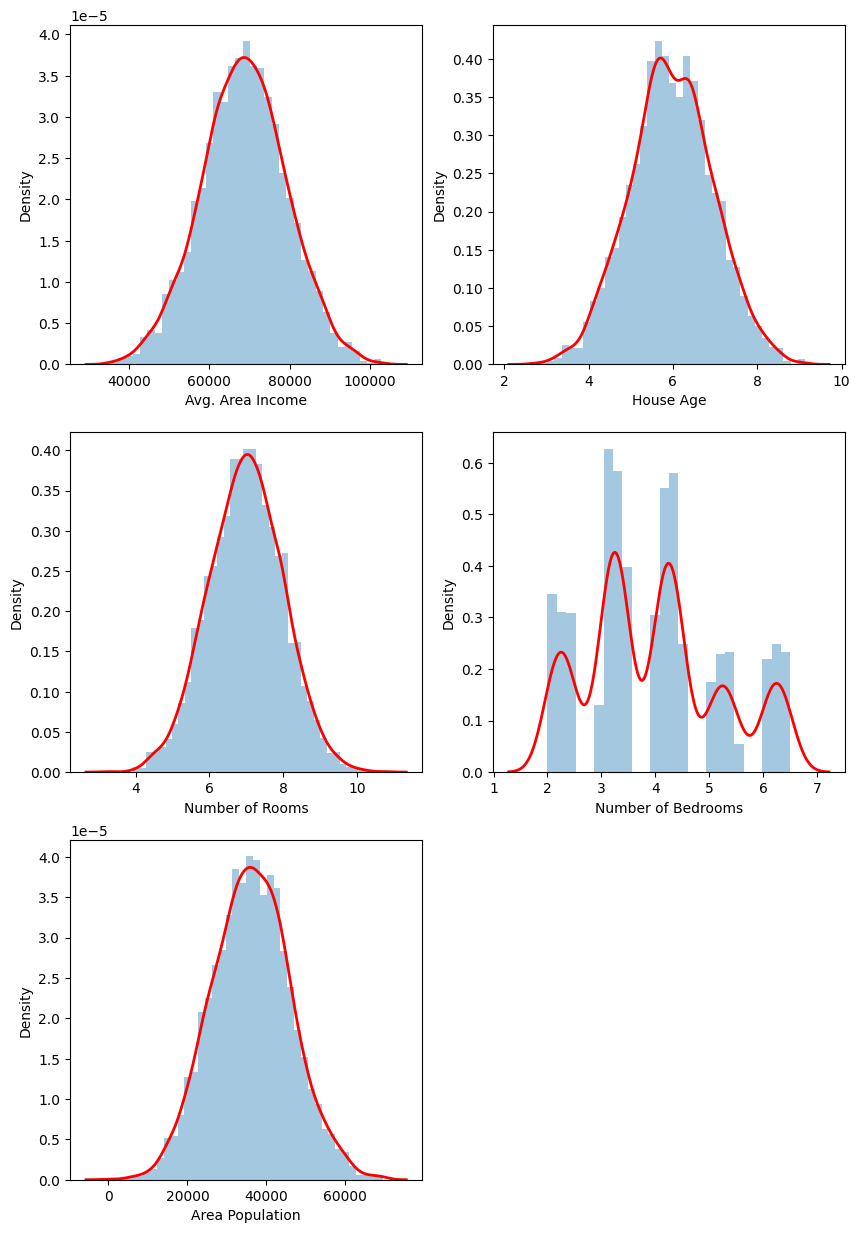

In [318]:
plt.figure(figsize=(10,15))
for i,var in enumerate(X_train):
  plt.subplot(3,2, i+1)
  sns.distplot(X_train[var], hist=20, kde_kws={'linewidth':2, 'color':'red'})
plt.show()

In [348]:
def func_transform(transform):
  
  trf1 = ColumnTransformer([('transform',FunctionTransformer(transform),[3])],remainder='passthrough')
  X_train_trans = trf1.fit_transform(X_train)
  X_test_trans = trf1.transform(X_test)
  pd_X_train = pd.DataFrame(X_train_trans)
  pd_X_test = pd.DataFrame(X_test_trans)

  lr.fit(pd_X_train,y_train)
  print('Accuracy lr :', cross_val_score(lr,pd_X_test, y_test).mean())

In [350]:
func_transform(np.square)

Accuracy lr : 0.9155105916666401


In [322]:
lr.fit(X_train,y_train)
cross_val_score(lr,X_test,y_test).mean()

0.9154832829652424

In [323]:
trf = ColumnTransformer([
    ('sqrt',FunctionTransformer(func=np.sqrt),[3])
],remainder='passthrough')

In [334]:
trf_X_train = trf.fit_transform(X_train)
trf_X_test = trf.transform(X_test)

In [335]:
trf_X_train_df = pd.DataFrame(trf_X_train)
trf_X_test_df = pd.DataFrame(trf_X_test)

In [338]:
lr.fit(trf_X_train_df,y_train)
cross_val_score(lr,trf_X_test_df,y_test).mean()

0.9154741836665263